In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [4]:
dt = pd.read_csv('properties-cleaned-v3.csv')

In [5]:
dt.sample(2)

society  price     sector  pricePerSqft propertyType  \
1499    ramprastha primera    1.6  sector 37       8888.89         flat   
2476    sector 43, gurgaon    8.0  sector 43           NaN        house   

        area  superbuilt  carpet  builtup  bedRooms  bathRooms  \
1499  1800.0      1800.0  1170.0   1440.0       3.0        3.0   
2476     NaN         NaN     NaN      NaN      10.0       11.0   

                                     address  floorNum facing  \
1499  Ramprastha Primera Sector 37D, Gurgaon      18.0  south   
2476                      sector 43, gurgaon       4.0  north   

                 agePossesion balcony  pooja room  servant room  study room  \
1499  relatively new property     NaN           1             0           0   
2476  relatively new property      3+           0             1           0   

      others  store room  furnishType  luxuryScore  
1499       0           0            1           94  
2476       0           0            0          126

# propertyType vs price

<Axes: xlabel='propertyType', ylabel='price'>

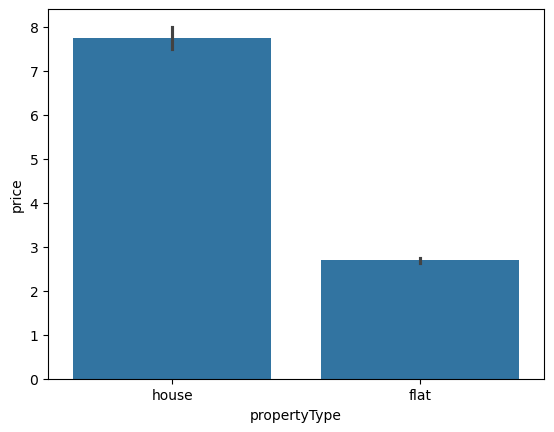

In [7]:
sns.barplot(x = dt['propertyType'] , y = dt['price'],estimator = np.median)

<Axes: xlabel='propertyType', ylabel='price'>

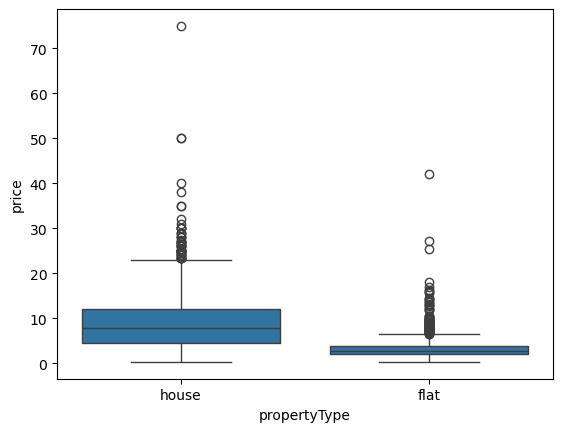

In [8]:
sns.boxplot(x = dt['propertyType'] , y = dt['price'])

# propertyType vs area

<Axes: xlabel='propertyType', ylabel='builtup'>

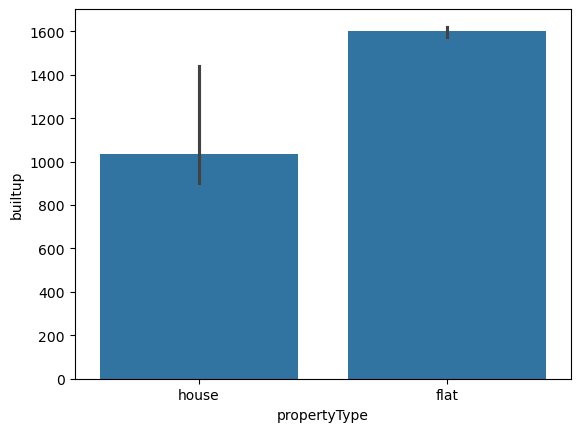

In [53]:
sns.barplot(x = dt['propertyType'] , y = dt['builtup'],estimator = np.median)

    - issue here maybe due to missing values , as the flats builtup is more than house which is not possible

In [49]:
dt['builtup'].isnull().sum()

1253

<Axes: xlabel='propertyType', ylabel='builtup'>

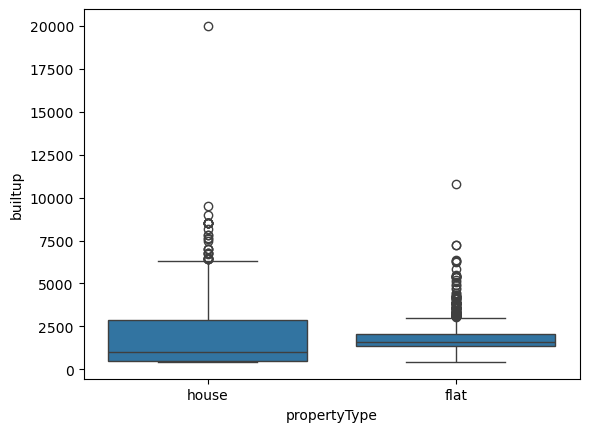

In [51]:
sns.boxplot(x = dt['propertyType'] , y = dt['builtup'])

# propertyType vs pricepersqft

<Axes: xlabel='propertyType', ylabel='pricePerSqft'>

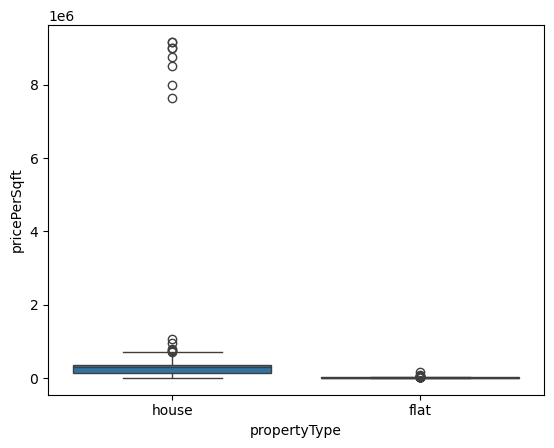

In [56]:
sns.boxplot(x = dt['propertyType'] , y = dt['pricePerSqft'])

<Axes: xlabel='propertyType', ylabel='pricePerSqft'>

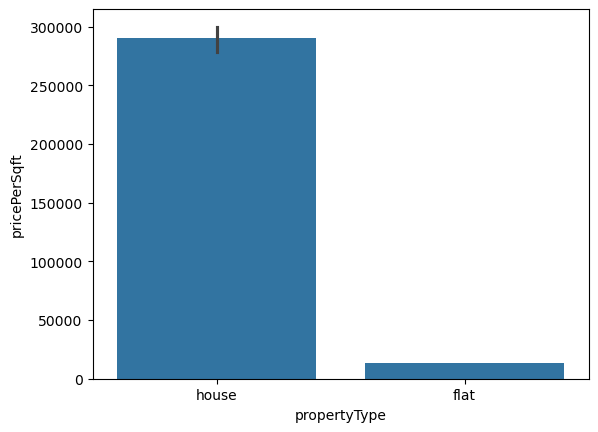

In [62]:
sns.barplot(x = dt['propertyType'] , y = dt['pricePerSqft'],estimator = np.median)

In [66]:
# this is very concerning for houses that this huge price per sqft is not possible
# and the outliers would also not puch much affect as i used median as estimator 
# so ther is issue we need to resolve this 

In [82]:
dt[dt['pricePerSqft']>=10000]

society  price  \
0                                  palam vihar, gurgaon   4.26   
2          central park flower valley aqua front towers   2.50   
3                                    sector 45, gurgaon   8.30   
7                              bptp mansions park prime   3.90   
8                                         tata primanti   4.84   
11                                           tarc maceo   1.93   
12                              adani m2k oyster grande   2.55   
16                 shapoorji pallonji joyville gurugram   1.85   
17      independent floor at dlf city, v block dlf p...   5.31   
18                                          ats triumph   3.80   
21                                          m3m skycity   3.77   
23            cyber city, t block, dlf phase 3, gurgaon   8.39   
24                      tulip ivory, sector 70, gurgaon   4.70   
26                 dlf city phase 1, sector 26, gurgaon  20.00   
27                              indiabulls centrum park   1.50   
28                              indiabulls centrum park   2.00   
30                       emaar mgf palm terraces select   4.20   
33                                         vipul greens   3.20   
34                              adani m2k oyster grande   3.70   
37            emaar mgf the vilas, dlf phase 2, gurgaon  18.50   
38                                      mrg the balcony   0.66   
39                                     dlf park heights   8.00   
45               pocket e sector 2 palam vihar, gurgaon  10.50   
49                                     dlf the skycourt   2.25   
50                          bestech park view sanskruti   2.25   
52                    tata primanti, sector 72, gurgaon   6.50   
53                    tata primanti, sector 72, gurgaon  11.00   
55                    tata primanti, sector 72, gurgaon  16.70   
58                              shree vardhman victoria   2.35   
61                                    vatika gurgaon 21   1.90   
64                                          ss the leaf   1.75   
66                                      emaar digihomes   3.57   
69                               bptp freedom park life   3.50   
70                                    indiabulls enigma   8.20   
71                                           sobha city   4.90   
72                                         vipul greens   2.80   
73                                         pioneer park   2.30   
75                    tata primanti, sector 72, gurgaon  10.50   
78                                        tata primanti   6.35   
81                             emaar mgf emerald estate   1.90   
85                                   emaar palm gardens   2.55   
88                                         pioneer park   2.85   
90                                          ats triumph   2.55   
91      dlf city plots phase 3, v block dlf phase 3,...   5.20   
95                                    parsvnath exotica   9.00   
97                                    conscient elevate   6.25   
98                                         ats tourmale   2.05   
99                                   sector 46, gurgaon   3.60   
100                shapoorji pallonji joyville gurugram   1.91   
101                                  sector 80, gurgaon   2.69   
102                             indiabulls centrum park   1.80   
104                                         tulip ivory   4.81   
105                                sri kirti apartments   2.90   
106                                   vatika gurgaon 21   1.86   
108                                    gpl eden heights   2.62   
110                                         ats triumph   3.60   
111                                  sector 46, gurgaon  14.50   
112                                 ireo victory valley   4.45   
116                               south city 1, gurgaon   9.00   
117                                   vatika gurgaon 21   2.17   
118                   

    - the problem was in case where area was nan , when we divided for per sq feet price
    - price/area it gave huge garbage values 
    - so we need to drop them 

In [71]:
dt['pricePerSqft'] = dt['pricePerSqft'].mask(dt['area'].isnull() , np.nan)

<Axes: xlabel='propertyType', ylabel='pricePerSqft'>

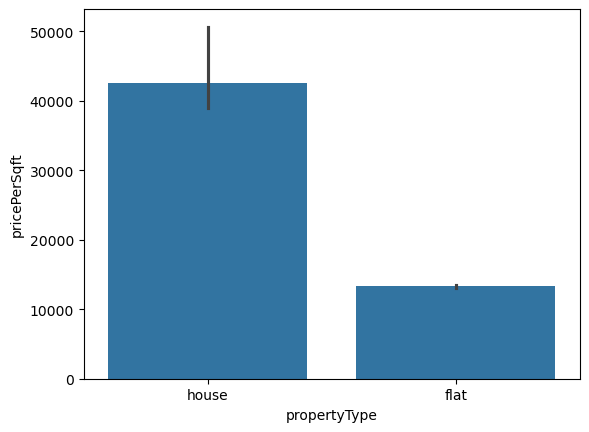

In [73]:
sns.barplot(x = dt['propertyType'] , y = dt['pricePerSqft'] , estimator = np.median)

     - much better but still the price is still too high we need to check for this issue

# propertyType vs bedRoom

In [92]:
pd.crosstab(dt['propertyType'],dt['bedRooms'])

bedRooms      1.0   2.0   3.0   4.0   5.0   6.0   7.0   8.0   9.0   10.0  \
propertyType                                                               
flat             3   349  1254   477    34     1     1     0     0     0   
house            4    58   201   398   344   215    67    47    74    40   

bedRooms      11.0  12.0  13.0  14.0  15.0  16.0  17.0  18.0  19.0  20.0  \
propertyType                                                               
flat             0     0     0     0     0     0     0     0     0     0   
house           19    38     6     3     3    14     1     2     2     7   

bedRooms      22.0  23.0  24.0  26.0  27.0  32.0  36.0  39.0  49.0  
propertyType                                                        
flat             0     0     0     0     0     0     0     0     0  
house            5     1     3     1     1     2     3     1     1

In [94]:
dt[dt['bedRooms']>=20]

society  price     sector  \
141                               sector 45, gurgaon  20.00  sector 45   
225                               sector 31, gurgaon   8.00  sector 31   
573                     sushant lok phase 1, gurgaon   8.00  sector 43   
594                             dlf phase 3, gurgaon  30.00  sector 23   
916                               sector 40, gurgaon  14.00  sector 40   
944                               sector 38, gurgaon  18.00  sector 38   
1168                              sector 42, gurgaon  14.25  sector 42   
1269             garden villas, dlf phase 4, gurgaon  11.90  sector 28   
1694           block c, sushant lok phase 1, gurgaon  11.50  sector 43   
1819                 vipul world, sector 48, gurgaon   8.50  sector 48   
1894                    s block dlf phase 3, gurgaon  15.00  sector 23   
1896                              sector 45, gurgaon  15.50  sector 45   
2355                    u block dlf phase 3, gurgaon   5.50  sector 23   
2432                    sushant lok phase 1, gurgaon   7.75  sector 43   
2443                    s block dlf phase 3, gurgaon  19.00  sector 23   
2601                         dlf cyber city, gurgaon  15.50  sector 24   
2620                    v block dlf phase 3, gurgaon   9.50  sector 23   
2637                              sector 45, gurgaon  20.00  sector 45   
2792            a block sushant lok phase 1, gurgaon  14.50  sector 43   
2915         ansal sushant lok 2, sector 56, gurgaon  13.50  sector 56   
3063                cyber city, dlf phase 3, gurgaon   7.65  sector 23   
3246    dlf city plots phase 4, dlf phase 4, gurgaon  12.00  sector 28   
3317                cyber city, dlf phase 3, gurgaon  22.00  sector 23   
3402                    s block dlf phase 3, gurgaon  23.00  sector 23   
3416           block c, sushant lok phase 1, gurgaon  13.00  sector 43   

      pricePerSqft propertyType    area  superbuilt   carpet  builtup  \
141      400000.00        house   500.0       650.0   425.00    500.0   
225            NaN        house     NaN         NaN      NaN      NaN   
573       16842.11        house  4750.0      6175.0  4037.50   4750.0   
594      597609.56        house   502.0       652.6   426.70    502.0   
916            NaN        house     NaN         NaN      NaN      NaN   
944      358565.74        house   502.0       652.6   426.70    502.0   
1168           NaN        house     NaN         NaN      NaN      NaN   
1269           NaN        house     NaN         NaN      NaN      NaN   
1694           NaN        house     NaN         NaN      NaN      NaN   
1819           NaN        house     NaN       429.0      NaN      NaN   
1894     321199.14        house   467.0       607.1      NaN    467.0   
1896           NaN        house     NaN       461.5      NaN      NaN   
2355           NaN        house     NaN         NaN      NaN      NaN   
2432      14351.85        house  5400.0      7020.0  4590.00   5400.0   
2443     380000.00        house   500.0       650.0   425.00    500.0   
2601     270506.11        house   573.0       744.9   487.05    573.0   
2620      70370.37        house  1350.0      1755.0  1147.50   1350.0   
2637      57142.86        house  3500.0      4550.0  2975.00   3500.0   
2792           NaN        house     NaN       468.0      NaN      NaN   
2915           NaN        house     NaN         NaN      NaN      NaN   
3063           NaN        house     NaN         NaN      NaN      NaN   
3246           NaN        house     NaN         NaN      NaN      NaN   
3317     440000.00        house   500.0       650.0   425.00    500.0   
3402     458167.33        house   502.0       652.6   426.70    502.0   
3416           NaN        house     NaN         NaN      NaN      NaN   

      bedRooms  bathRooms                                         address  \
141       36.0       40.0                              sector 45, gurgaon   
225       22.0       22.0                              sector 31, g

    - this cant be possible that house is 500 sq ft and has 36 bedrooms so , it is entry error
    - there are other values too like that 

# propertyType vs floornum

<Axes: xlabel='propertyType', ylabel='floorNum'>

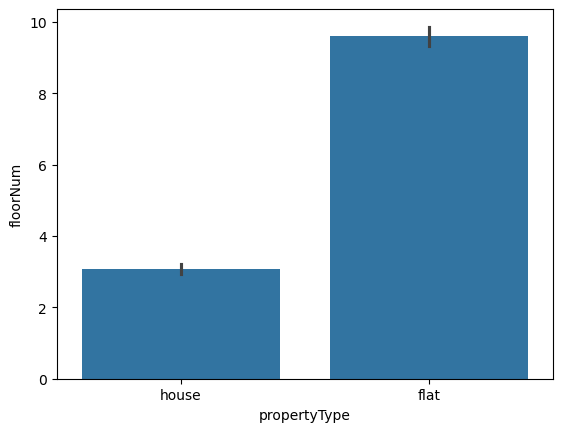

In [103]:
sns.barplot(x=dt['propertyType'],y=dt['floorNum'])

<Axes: xlabel='propertyType', ylabel='floorNum'>

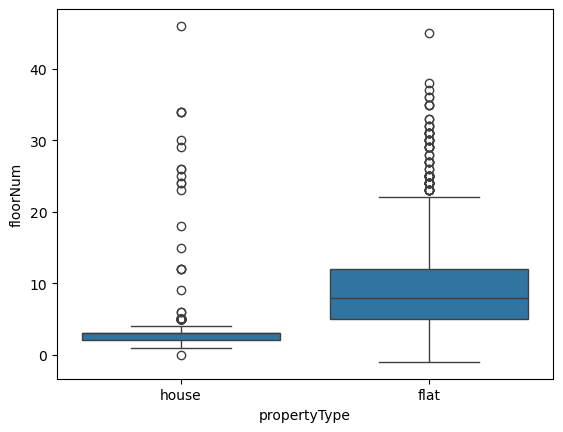

In [105]:
sns.boxplot(x=dt['propertyType'],y=dt['floorNum'])

In [115]:
# how these houses , have 15 plus floors 

In [113]:
dt[(dt['floorNum']>=15)&(dt['propertyType']=='house')]

society  price      sector  \
35                      paras dews, sector 106, gurgaon   1.65  sector 106   
101                                  sector 80, gurgaon   2.69   sector 80   
154          conscient heritage one, sector 62, gurgaon   2.90   sector 62   
169                     paras dews, sector 106, gurgaon   2.15  sector 106   
419           bestech spa signature, sector 81, gurgaon   5.40   sector 81   
616                     trump tower, sector 65, gurgaon  13.50   sector 65   
703                                  sector 80, gurgaon   2.70   sector 80   
1337                                 sector 80, gurgaon   2.71   sector 80   
1720    shapoorji pallonji joyville gurugram, sector...   1.30  sector 102   
1929             experion wdchants, sector 112, gurgaon   9.30  sector 112   
2009                     sare homes, sector 92, gurgaon   1.70   sector 92   
2354                                 sector 78, gurgaon   4.95   sector 78   
3116         bestech park view city, sector 48, gurgaon   5.50   sector 48   
3555            ireo victory valley, sector 67, gurgaon   4.75   sector 67   

      pricePerSqft propertyType    area  superbuilt   carpet  builtup  \
35             NaN        house     NaN         NaN      NaN      NaN   
101       13759.59        house  1955.0     2443.75  1564.00   1955.0   
154       14948.45        house  1940.0     2425.00  1552.00   1940.0   
169            NaN        house     NaN         NaN      NaN      NaN   
419            NaN        house     NaN         NaN      NaN      NaN   
616       29670.33        house  4550.0     5915.00  3867.50   4550.0   
703       13810.74        house  1955.0     2443.75  1564.00   1955.0   
1337      13861.89        house  1955.0     2443.75  1564.00   1955.0   
1720      13669.82        house   951.0     1141.20   713.25    951.0   
1929           NaN        house     NaN         NaN      NaN      NaN   
2009           NaN        house     NaN         NaN      NaN      NaN   
2354           NaN        house     NaN         NaN      NaN      NaN   
3116      12079.95        house  4553.0     5918.90  3870.05   4553.0   
3555      18157.49        house  2616.0     3270.00  2092.80   2616.0   

      bedRooms  bathRooms                                            address  \
35         2.0        3.0                    paras dews, sector 106, gurgaon   
101        3.0        2.0                                 sector 80, gurgaon   
154        3.0        4.0         conscient heritage one, sector 62, gurgaon   
169        4.0        3.0                    paras dews, sector 106, gurgaon   
419        4.0        4.0          bestech spa signature, sector 81, gurgaon   
616        4.0        4.0                    trump tower, sector 65, gurgaon   
703        3.0        2.0                                 sector 80, gurgaon   
1337       3.0        2.0                                 sector 80, gurgaon   
1720       2.0        2.0    shapoorji pallonji joyville gurugram, sector...   
1929       4.0        4.0             experion wdchants, sector 112, gurgaon   
2009       4.0        4.0                     sare homes, sector 92, gurgaon   
2354       4.0        4.0                                 sector 78, gurgaon   
3116       5.0        5.0         bestech park view city, sector 48, gurgaon   
3555       3.0        3.0            ireo victory valley, sector 67, gurgaon   

      floorNum      facing             agePossesion balcony  pooja room  \
35        24.0        east  relatively new property       2           1   
101       34.0        east       under construction      3+           0   
154       25.0        east  relatively new property       3           0   
169       23.0          na  relatively new property       3           1   
419       29.0          na   moderatly old property      3+           1   
616       46.0        east             new property      3+           0   
703       34.0        east       under construction    

In [121]:
# these , properties are apartments but still called as houses 
# ( we can look it in address as it stated trump tower for example )

<Axes: xlabel='agePossesion', ylabel='propertyType'>

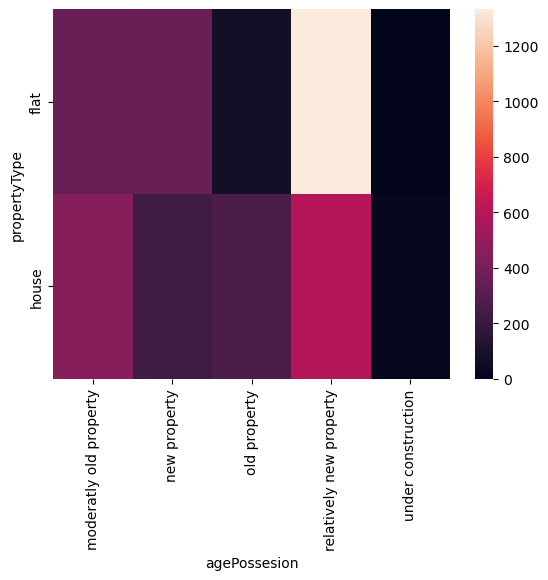

In [127]:
sns.heatmap(pd.crosstab(dt['propertyType'],dt['agePossesion']))

<Axes: xlabel='agePossesion', ylabel='propertyType'>

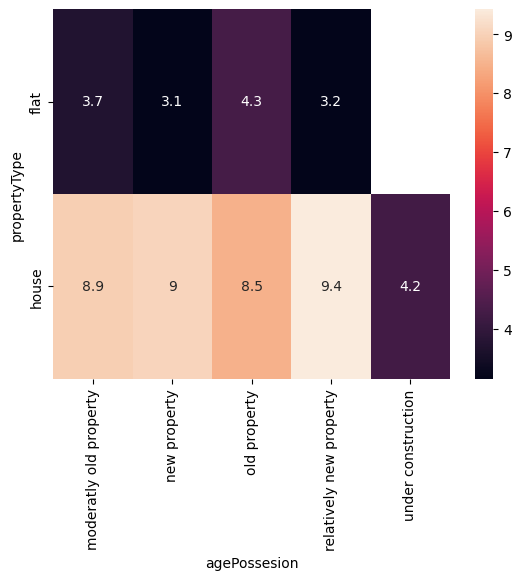

In [145]:
sns.heatmap(pd.pivot_table(dt,index='propertyType',columns='agePossesion',values='price',aggfunc='mean'),annot = True)

<Axes: xlabel='bedRooms', ylabel='propertyType'>

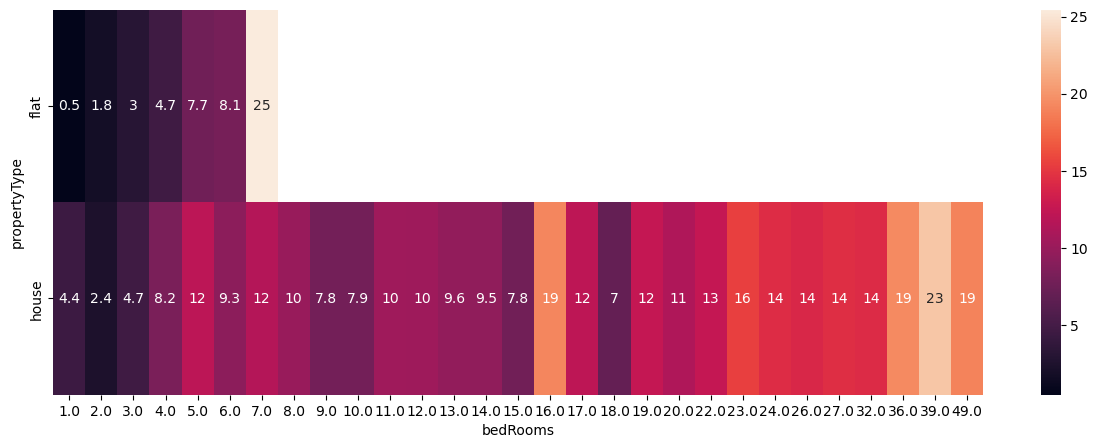

In [157]:
plt.figure(figsize=(15,5))
sns.heatmap(pd.pivot_table(dt,index='propertyType',columns='bedRooms',values='price',aggfunc='mean'),annot=True)

<Axes: xlabel='furnishType', ylabel='propertyType'>

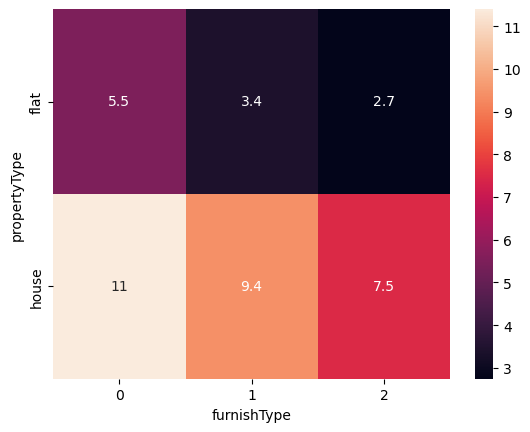

In [161]:
sns.heatmap(pd.pivot_table(dt,index='propertyType',columns='furnishType',values='price',aggfunc='mean'),annot=True)

<Axes: xlabel='propertyType', ylabel='luxuryScore'>

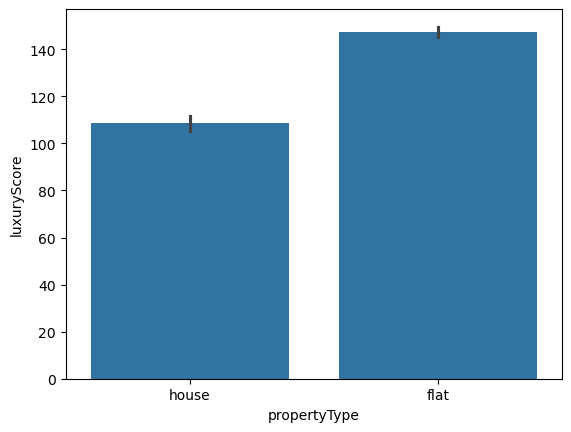

In [165]:
sns.barplot(x=dt['propertyType'],y=dt['luxuryScore'])

<Axes: xlabel='propertyType', ylabel='luxuryScore'>

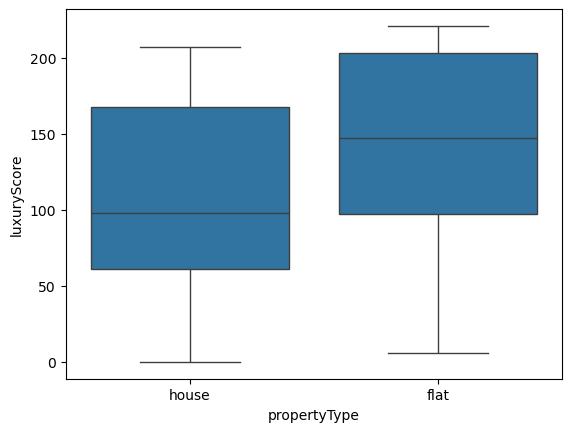

In [167]:
sns.boxplot(x=dt['propertyType'],y=dt['luxuryScore'])

<Axes: xlabel='sector', ylabel='propertyType'>

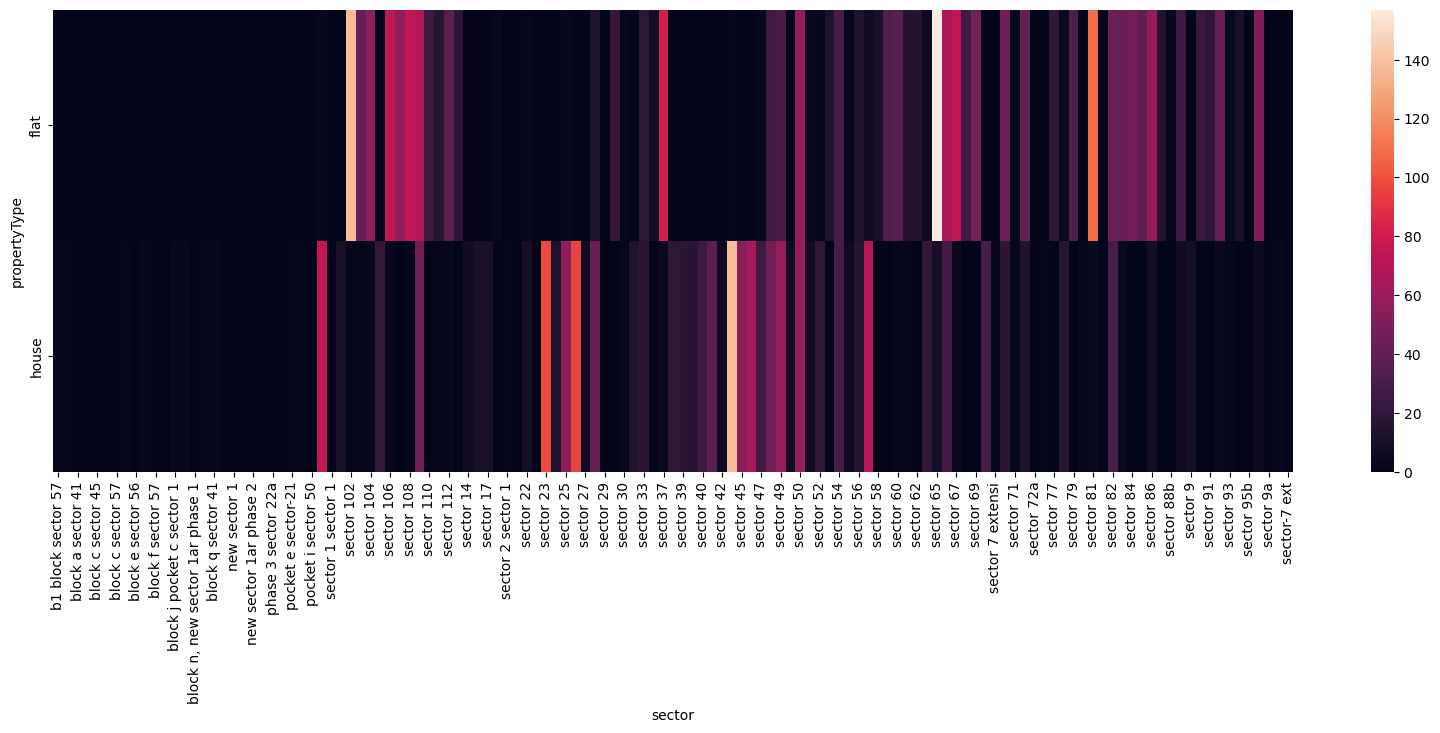

In [209]:
plt.figure(figsize=(20,6))
sns.heatmap(pd.crosstab(dt['propertyType'],dt['sector'].sort_index()))

# Price

<Axes: ylabel='sector'>

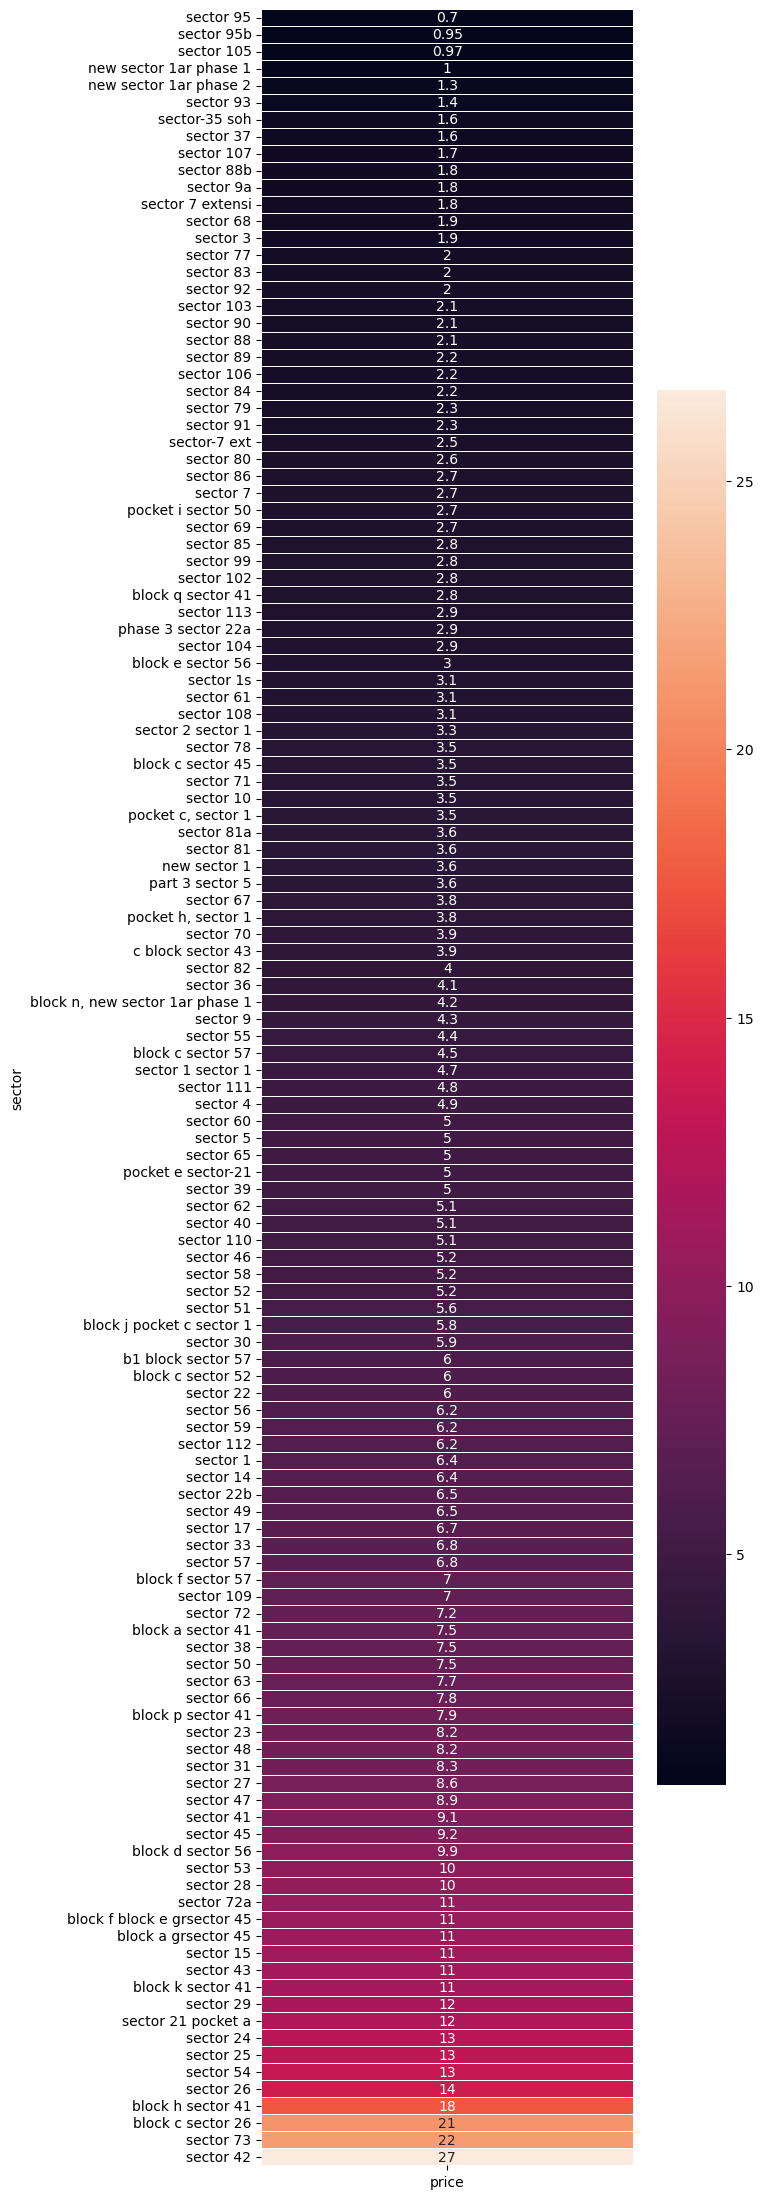

In [294]:
avg_price_per_sector = round(dt.groupby('sector')['price'].mean().sort_values(),2)
plt.figure(figsize=(6,28))
# we need to convert this series to a dataframe as , sns expects a 2D structure , so we used to_frame()
sns.heatmap(avg_price_per_sector.to_frame(),annot=True,linewidths=0.7)

<Axes: ylabel='sector'>

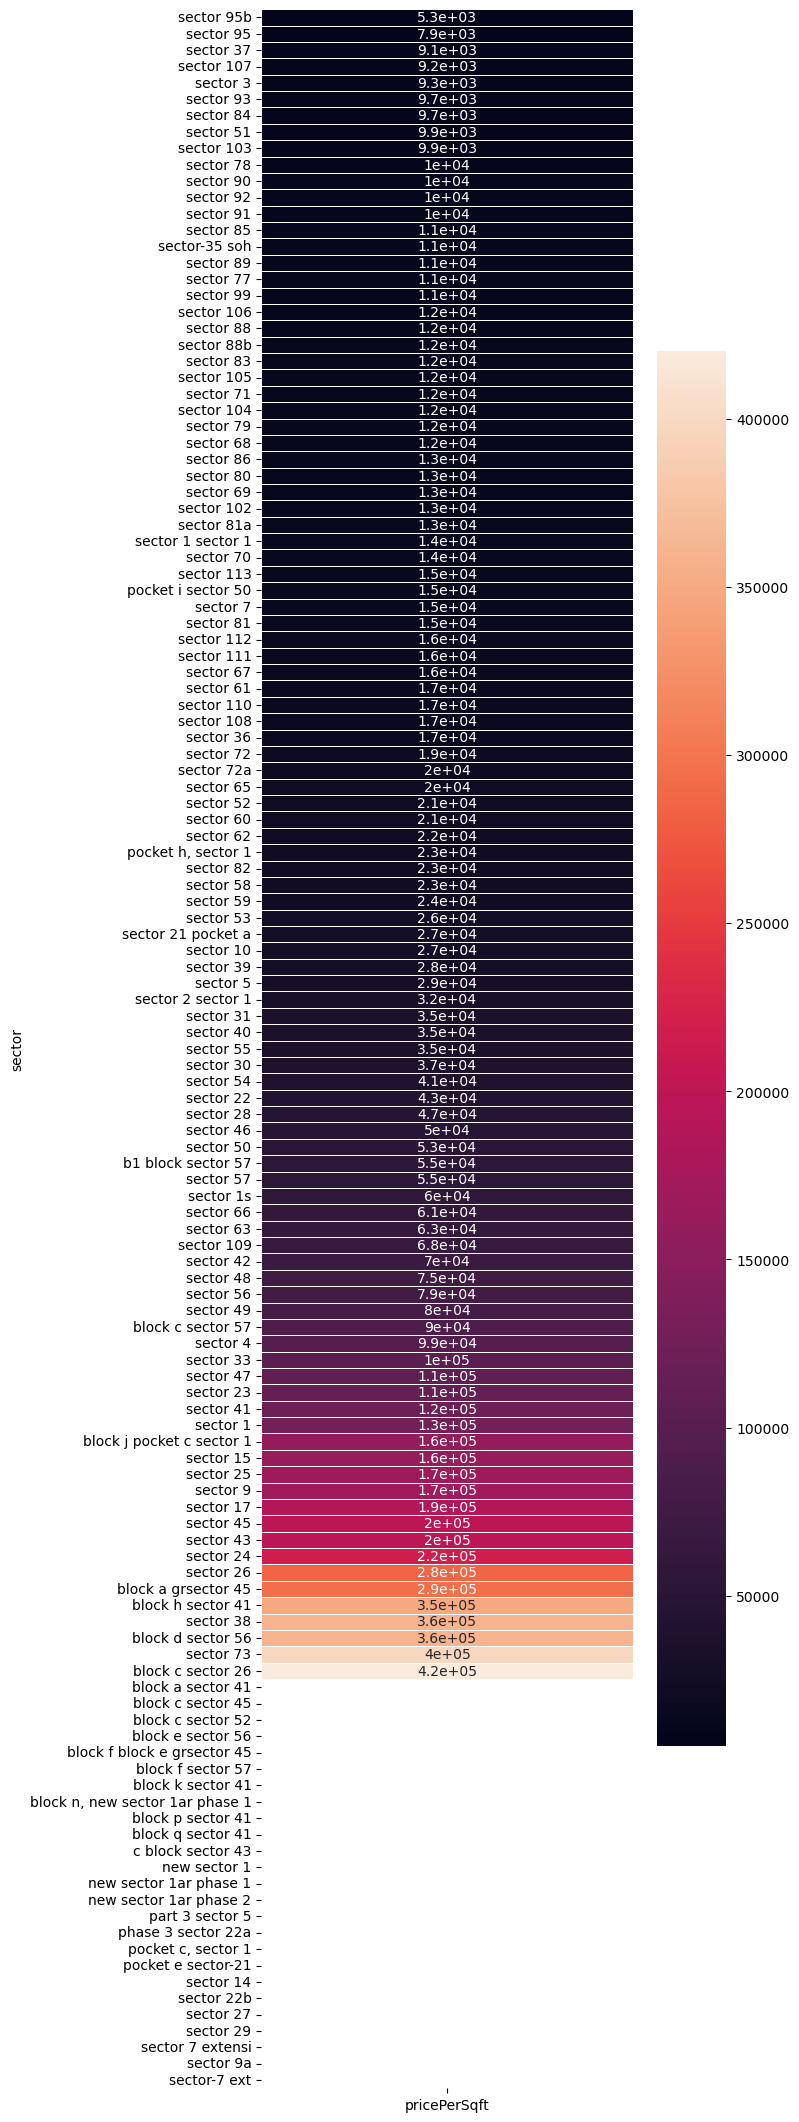

In [336]:
avg_price_per_sqft_per_sector = round(dt.groupby('sector')['pricePerSqft'].mean().sort_values(),2)
plt.figure(figsize=(6,27))
sns.heatmap(avg_price_per_sqft_per_sector.to_frame(),annot=True,linewidths=0.7)

<Axes: ylabel='sector'>

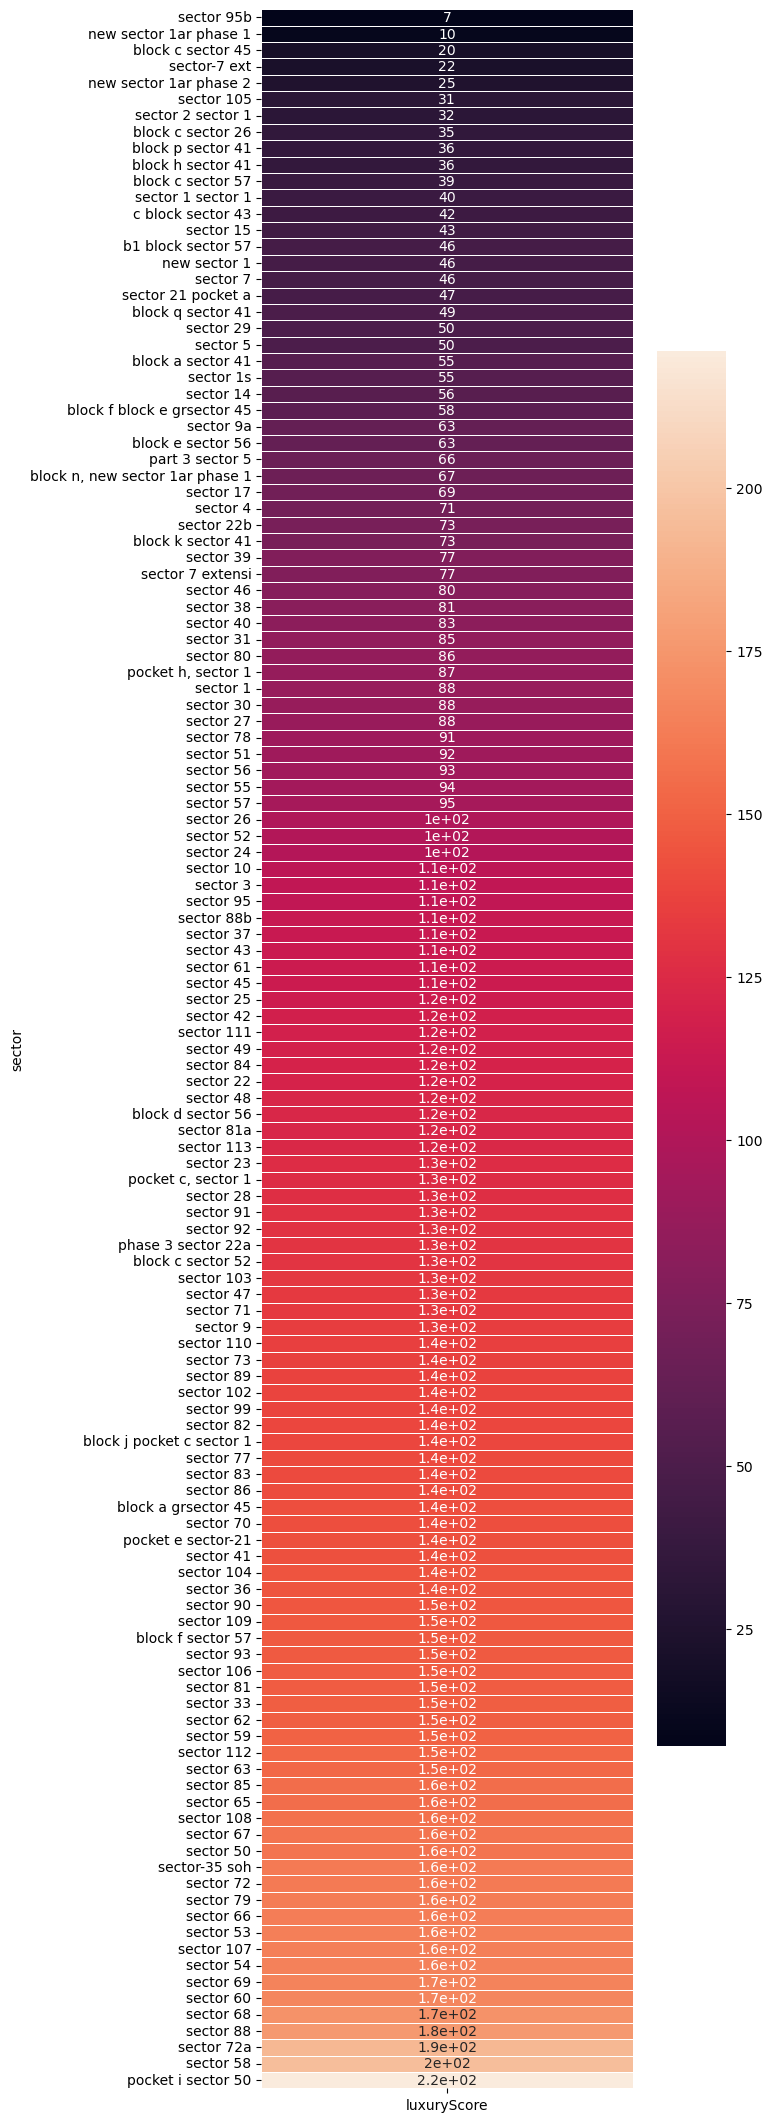

In [341]:
avg_price_per_sqft_per_sector = round(dt.groupby('sector')['luxuryScore'].mean().sort_values(),2)
plt.figure(figsize=(6,27))
sns.heatmap(avg_price_per_sqft_per_sector.to_frame(),annot=True,linewidths=0.7)

<Axes: xlabel='area', ylabel='price'>

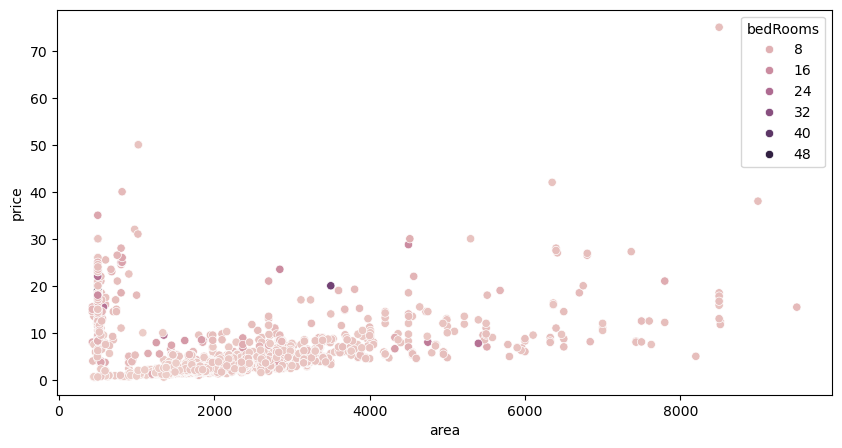

In [383]:
plt.figure(figsize=(10,5))
sns.scatterplot(x = dt[dt['area']<10000]['area'], y = dt['price'],hue=dt['bedRooms'])

<Axes: xlabel='area', ylabel='price'>

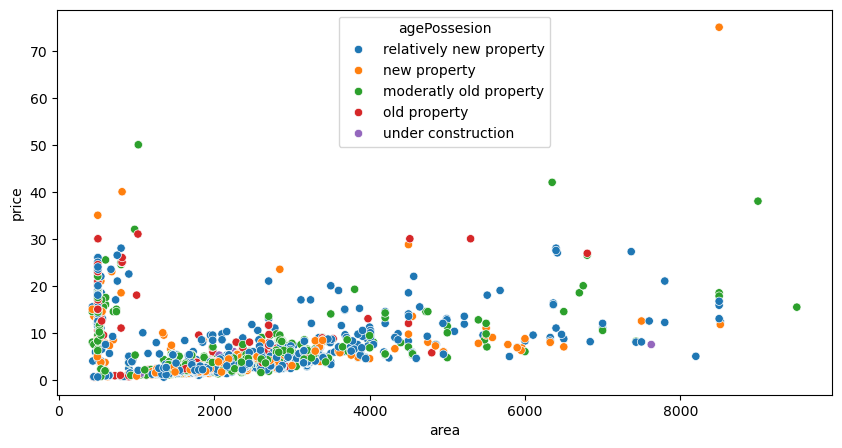

In [389]:
plt.figure(figsize=(10,5))
sns.scatterplot(x = dt[dt['area']<10000]['area'], y = dt['price'],hue=dt['agePossesion'])

<Axes: xlabel='area', ylabel='price'>

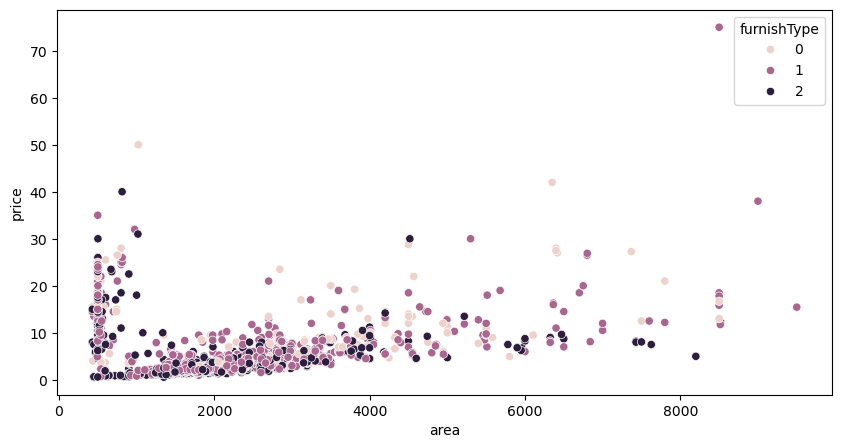

In [393]:
plt.figure(figsize=(10,5))
sns.scatterplot(x = dt[dt['area']<10000]['area'], y = dt['price'],hue=dt['furnishType'])

/var/folders/gy/lt_77nr13fs5zj9y4gdv7v4r0000gn/T/ipykernel_6162/3096980168.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dt['agePossesion'],y=dt['price'],estimator=np.median,palette='plasma')


([0, 1, 2, 3, 4],
 [Text(0, 0, 'relatively new property'),
  Text(1, 0, 'new property'),
  Text(2, 0, 'moderatly old property'),
  Text(3, 0, 'old property'),
  Text(4, 0, 'under construction')])

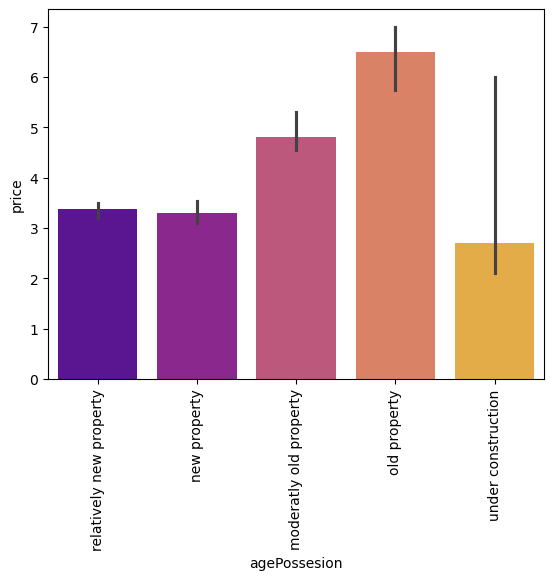

In [411]:
sns.barplot(x=dt['agePossesion'],y=dt['price'],estimator=np.median,palette='plasma')
plt.xticks(rotation = 'vertical')

<Axes: xlabel='luxuryScore', ylabel='price'>

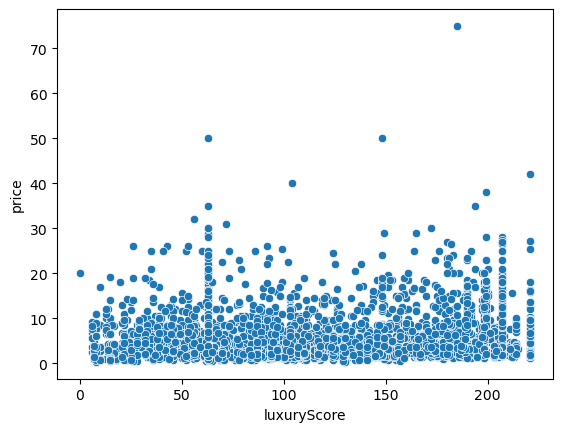

In [419]:
sns.scatterplot(x=dt['luxuryScore'],y=dt['price'])

# correlation

<Axes: >

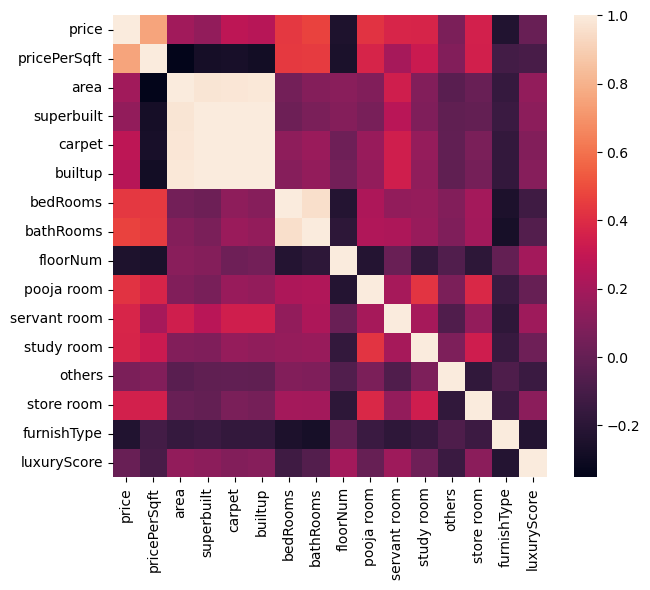

In [454]:
plt.figure(figsize=(7,6))
sns.heatmap(dt.select_dtypes(np.number).corr())

In [458]:
dt.select_dtypes(np.number).corr()['price']

price           1.000000
pricePerSqft    0.755521
area            0.188245
superbuilt      0.139737
carpet          0.277813
builtup         0.258642
bedRooms        0.434696
bathRooms       0.470911
floorNum       -0.243766
pooja room      0.422246
servant room    0.374172
study room      0.367061
others          0.071721
store room      0.353109
furnishType    -0.231148
luxuryScore     0.009236
Name: price, dtype: float64